In [2]:
import os 
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np 
import statsmodels as sm 
import statsmodels.formula.api as smf
from scipy.stats import t as tdist
from statsmodels.stats.outliers_influence import summary_table 
get_ipython().magic(u'matplotlib inline')

In [3]:
os.getcwd()

'/Users/sahiljain'

In [4]:
os.chdir("/Users/sahiljain/Downloads")

In [5]:
bikeShare = pd.read_csv('bike_share.csv')

In [6]:
# Let y = count, x1, x2, x3, x4 be temprature, humidity, windspeed, season
# and Weather respectively
y = bikeShare["count"]
x1 = bikeShare["temp"]
x2 = bikeShare["humidity"]
x3 = bikeShare["windspeed"]
x4 = bikeShare["season"]
x5 = bikeShare["weather"]

In [7]:
#(A) Fit a simple linear regression model relating count to temp.
# Formally test Beta_1 = 0 and beta_1 != 0. 

# Linear model of count to temp. 
lm = smf.OLS(y, sm.tools.tools.add_constant(x1),)
model1 = lm.fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.156
Model:                            OLS   Adj. R-squared:                  0.156
Method:                 Least Squares   F-statistic:                     2006.
Date:                Tue, 26 Sep 2017   Prob (F-statistic):               0.00
Time:                        22:12:54   Log-Likelihood:                -71125.
No. Observations:               10886   AIC:                         1.423e+05
Df Residuals:                   10884   BIC:                         1.423e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -156.9856      7.945    -19.759      0.000    -172.560    -141.412
temp           5.0947      0.114     44.783      0.000       4.872       5.318
==============================================================================
Omnibus:                     1871.687   Durbin-Watson:                   0.369
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3221.966
Skew:                           1.123   Prob(JB):                         0.00
Kurtosis:                       4.434   Cond. No.                         348.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [8]:
# Calculating the parameters manually. 
# Beta1_hat 
beta1a_hat = np.corrcoef(x1,y)[0,1] * np.std(y) / np.std(x1)
beta1a_hat

5.0947447119035711

In [34]:
# Beta0_hat
beta0a_hat = np.mean(y) - beta1a_hat * np.mean(x1)
beta0a_hat

-156.98561782130787

In [10]:
# H0 : beta1 = 0 vs Ha : beta1 != 0
se_beta1a = model1.bse[1]
t = beta1a_hat /  se_beta1a
p_val1 = 2 * (1 - tdist.cdf(np.abs(t), df = 10884))
print("The p-value associated with Ho: beta1 = 0 is ", p_val1)

('The p-value associated with Ho: beta1 = 0 is ', 0.0)


In [11]:
# 95% Confindece Inteval for beta1 
crit_val = tdist.ppf(0.975, df = 10884)
low_CI = beta1a_hat - crit_val*se_beta1a
upp_CI = beta1a_hat + crit_val*se_beta1a
print("The 95% confidence for beta1 is : ", low_CI, upp_CI)

('The 95% confidence for beta1 is : ', 4.8717449933595889, 5.3177444304475534)


In [12]:
# Interpretaion : From the p-value which is 0, we will not reject the 
# null hypothesis and the level of confidence in 99.5%. This means that 
# variable windspeed is highly significant and bike rentals are 
# significantly influenced by the temprature.


In [13]:
# (B) Fit a simple linear regression model relating count to humidity. 
# Formally test Beta_1 = 0 and beta_1 != 0. 

# Linear model of count to humidity 
lm = smf.OLS(y, sm.tools.tools.add_constant(x2),)
model2 = lm.fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.101
Model:                            OLS   Adj. R-squared:                  0.101
Method:                 Least Squares   F-statistic:                     1219.
Date:                Tue, 26 Sep 2017   Prob (F-statistic):          2.92e-253
Time:                        22:13:02   Log-Likelihood:                -71468.
No. Observations:               10886   AIC:                         1.429e+05
Df Residuals:                   10884   BIC:                         1.430e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        376.4456      5.545     67.890      0.000     365.577     387.315
humidity      -2.9873      0.086    -34.915      0.000      -3.155      -2.820
==============================================================================
Omnibus:                     2068.515   Durbin-Watson:                   0.351
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3709.739
Skew:                           1.210   Prob(JB):                         0.00
Kurtosis:                       4.525   Cond. No.                         218.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [14]:
# Calculating the parameters manually 

# Beta1_hat 
beta1b_hat = np.corrcoef(x2,y)[0,1] * np.std(y) / np.std(x2)
beta1b_hat

-2.9872685785344091

In [15]:
# Beta0_hat
beta0b_hat = np.mean(y) - beta1b_hat * np.mean(x2)
beta0b_hat

376.44560833036167

In [16]:
# H0: beta1 = 0 vs Ha: beta1 != 0
se_beta1b = model2.bse[1]
t = beta1b_hat / se_beta1b
p_val2 = 2 * (1 - tdist.cdf(np.abs(t), df = 10884))
print("The p_value associated with Count vs humidity is ", p_val2)

('The p_value associated with Count vs humidity is ', 0.0)


In [17]:
# 95% Confindece Inteval for beta1 
crit_val = tdist.ppf(0.975, df = 10884)
low_CI = beta1b_hat - crit_val*se_beta1b
upp_CI = beta1b_hat + crit_val*se_beta1b
print("The 95% confidence for beta1 is : ", low_CI, upp_CI)

('The 95% confidence for beta1 is : ', -3.1549769885633285, -2.8195601685054896)


In [18]:
# Interpretation : From the p-value which is 2.92 * 10^-253 < 0, 
# we will not reject the null hypothesis and the level of confidence 
# in 99.5%. This means that variable humidity is highly significant and
# bike rentals are significantly influenced by the humidity. 


In [19]:
# (C) Fit a simple linear regression model relating count to Windspeed. 
# Formally test Beta_1 = 0 and beta_1 != 0. 

# Linear model between count vs windspeed.
lm = smf.OLS(y, sm.tools.tools.add_constant(x3), )
model3 = lm.fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.010
Model:                            OLS   Adj. R-squared:                  0.010
Method:                 Least Squares   F-statistic:                     113.0
Date:                Tue, 26 Sep 2017   Prob (F-statistic):           2.90e-26
Time:                        22:13:11   Log-Likelihood:                -71989.
No. Observations:               10886   AIC:                         1.440e+05
Df Residuals:                   10884   BIC:                         1.440e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        162.7876      3.212     50.682      0.000     156.492     169.084
windspeed      2.2491      0.212     10.630      0.000       1.834       2.664
==============================================================================
Omnibus:                     2086.612   Durbin-Watson:                   0.322
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3633.799
Skew:                           1.247   Prob(JB):                         0.00
Kurtosis:                       4.338   Cond. No.                         28.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [20]:
# Manually calculating the parametes. 

# beta1_hat 
beta1c_hat = np.corrcoef(x3,y)[0,1] * np.std(y) / np.std(x3)
beta1c_hat

2.2490579173365712

In [21]:
# beta0_hat
beta0c_hat = np.mean(y) - beta1c_hat * np.mean(x3)
beta0c_hat

162.78755033543703

In [22]:
# H0 : beta1 = 0 vs beta1 != 0
se_beta1c = model3.bse[1]
t = beta1c_hat / se_beta1c
p_val3 = 2 * (1 - tdist.cdf(np.abs(t), df = 10884))
print("The p-value associated with count vs windspeed is : ", p_val3)

('The p-value associated with count vs windspeed is : ', 0.0)


In [23]:
# 95% Confindece Inteval for beta1 
crit_val = tdist.ppf(0.975, df = 10884)
low_CI = beta1c_hat - crit_val*se_beta1c
upp_CI = beta1c_hat + crit_val*se_beta1c
print("The 95% confidence for beta1 is : ", low_CI, upp_CI)

('The 95% confidence for beta1 is : ', 1.8343401065677059, 2.6637757281054366)


In [24]:
# Interpretation : From the p-value which is 2.89 * 10^-26 < 0, we will 
# not reject the null hypothesis and the level of confidence in 99.5%.
# This means that variable windspeed is highly significant and bike 
# rentals are significantly influenced by the Windspeed. 

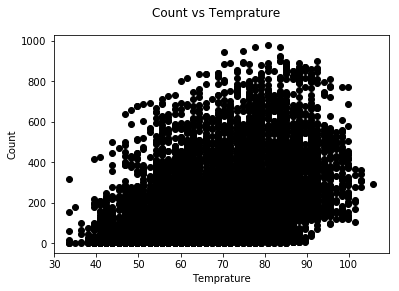

In [25]:
# (D) Construct three Scatter plots : (1) Count vs Temp 
# (2) Count vs Humidity and (3) Count vs Windspeed. On all of these, 
# plot the least squares line-of-best-fit, the 95% confindense interval 
# and the 95% prediction interval. 

# 1(a) Scatter plot of count vs temp. 
fig1 = plt.figure()
plt.scatter(x1,y, c = "black")
fig1.suptitle("Count vs Temprature")
plt.ylabel("Count")
plt.xlabel("Temprature")

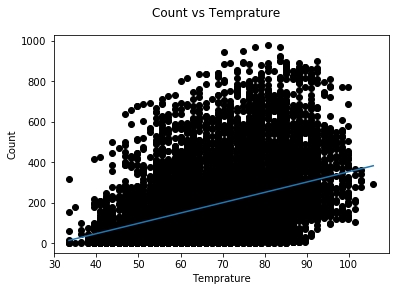

In [26]:
# 1(b) Scatter plot of count vs temp with line of best fit
fig1 = plt.figure()
plt.scatter(x1, y, c = "black")
fig1.suptitle("Count vs Temprature")
plt.ylabel("Count")
plt.xlabel("Temprature")
plt.plot(np.unique(x1), np.poly1d(np.polyfit(x1, y, 1))(np.unique(x1)))

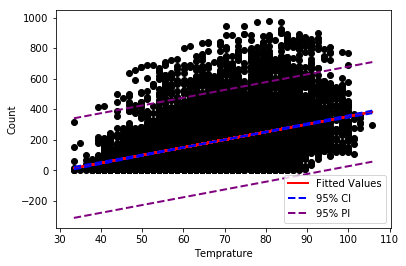

In [27]:
# 1(c) 95% Confidence interval and 95% prediction interval and 
# plotting them on them scatter plot. 

# Add the fitted line to the scatter plot
fitted_line, = plt.plot(x1, model1.predict(), '-', color = "red", linewidth = 2, label = "Fitted Values")

# 95% CI and PI 
beta0_hat = model1.params[0]
beta1_hat = model1.params[1]
sigma_hat = np.sqrt(model1.mse_resid)
n = bikeShare.shape[0]
sxx = n * np.var(x1)
xp = np.linspace(x1.min(), x1.max(), 100)
yp_hat = beta0_hat + beta1_hat * xp
se_mu0 = sigma_hat * np.sqrt((1/n) + ((xp-np.mean(x1))**2/sxx))
se_yp = sigma_hat * np.sqrt(1 + (1/n) + ((xp-np.mean(x1))**2/sxx))
crit_val = tdist.ppf(0.975, df = n-2)
ci_low = yp_hat - crit_val * se_mu0
ci_hi = yp_hat + crit_val * se_mu0
pi_low = yp_hat - crit_val * se_yp
pi_hi = yp_hat + crit_val * se_yp
plt.scatter(x1, y, c = "black")
fig1.suptitle("Count vs Temprature")
plt.ylabel("Count")
plt.xlabel("Temprature")
lowCI_line, = plt.plot(xp, ci_low, '--', color = "blue", linewidth = 2, label = "95% CI")
uppCI_line, = plt.plot(xp, ci_hi, '--', color = "blue", linewidth = 2, label = "95% CI")
lowPI_line, = plt.plot(xp, pi_low, '--', color = "purple", linewidth = 2, label = "95% PI")
uppPI_line, = plt.plot(xp, pi_hi, '--', color = "purple", linewidth = 2, label = "95% PI")
legend = plt.legend(handles = [fitted_line, lowCI_line, lowPI_line], loc = 4)

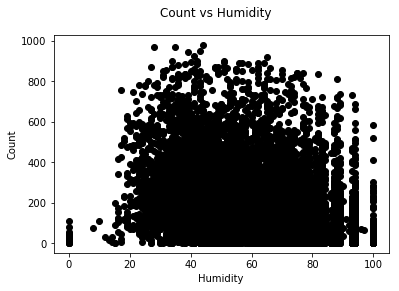

In [28]:
# 2(a) Scatter plot of Count vs Humidty 
fig2 = plt.figure()
plt.scatter(x2,y, c = "black")
fig2.suptitle("Count vs Humidity")
plt.ylabel("Count")
plt.xlabel("Humidity")

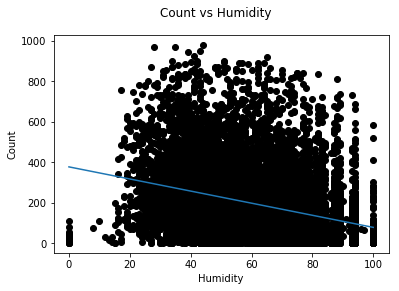

In [29]:
# 2(b) Line of best fit in Count vs Humidity 
fig2 = plt.figure()
plt.scatter(x2, y, c = "black")
fig2.suptitle("Count vs Humidity")
plt.ylabel("Count")
plt.xlabel("Humidity")
plt.plot(np.unique(x2), np.poly1d(np.polyfit(x2, y, 1))(np.unique(x2)))

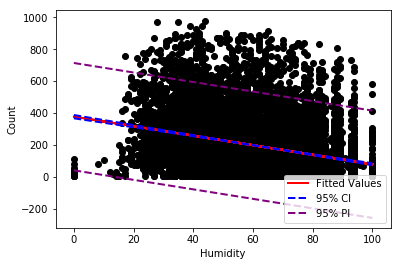

In [30]:
# 2(c) 95% Confidence interval and 95% prediction interval and 
# plotting them on them scatter plot. 

# Add the fitted line to the scatter plot
fitted_line, = plt.plot(x2, model2.predict(), '-', color = "red", linewidth = 2, label = "Fitted Values")

# 95% CI and PI 
beta0_hat = model2.params[0]
beta1_hat = model2.params[1]
sigma_hat = np.sqrt(model2.mse_resid)
n = bikeShare.shape[0]
sxx = n * np.var(x2)
xp = np.linspace(x2.min(), x2.max(), 100)
yp_hat = beta0_hat + beta1_hat * xp
se_mu0 = sigma_hat * np.sqrt((1/n) + ((xp-np.mean(x2))**2/sxx))
se_yp = sigma_hat * np.sqrt(1 + (1/n) + ((xp-np.mean(x2))**2/sxx))
crit_val = tdist.ppf(0.975, df = n-2)
ci_low = yp_hat - crit_val * se_mu0
ci_hi = yp_hat + crit_val * se_mu0
pi_low = yp_hat - crit_val * se_yp
pi_hi = yp_hat + crit_val * se_yp
plt.scatter(x2, y, c = "black")
fig1.suptitle("Count vs Humidity")
plt.ylabel("Count")
plt.xlabel("Humidity")
lowCI_line, = plt.plot(xp, ci_low, '--', color = "blue", linewidth = 2, label = "95% CI")
uppCI_line, = plt.plot(xp, ci_hi, '--', color = "blue", linewidth = 2, label = "95% CI")
lowPI_line, = plt.plot(xp, pi_low, '--', color = "purple", linewidth = 2, label = "95% PI")
uppPI_line, = plt.plot(xp, pi_hi, '--', color = "purple", linewidth = 2, label = "95% PI")
legend = plt.legend(handles = [fitted_line, lowCI_line, lowPI_line], loc = 4)

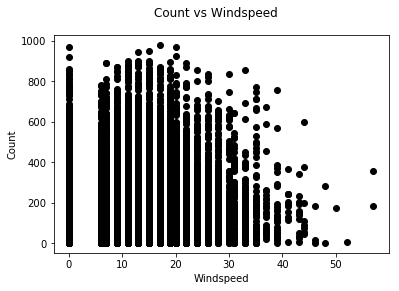

In [31]:
# 3(a) Scatter Plot for Count vs Windspeed
fig3 = plt.figure()
plt.scatter(x3,y, c = "black")
fig3.suptitle("Count vs Windspeed")
plt.ylabel("Count")
plt.xlabel("Windspeed")

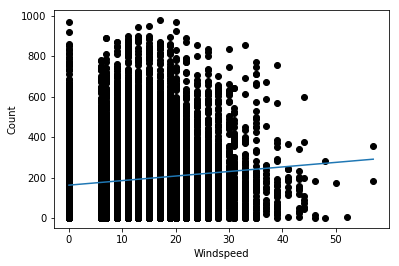

In [32]:
# 3(b) fig2 = plt.figure()
plt.scatter(x3, y, c = "black")
fig3.suptitle("Count vs Windspeed")
plt.ylabel("Count")
plt.xlabel("Windspeed")
plt.plot(np.unique(x3), np.poly1d(np.polyfit(x3, y, 1))(np.unique(x3)))

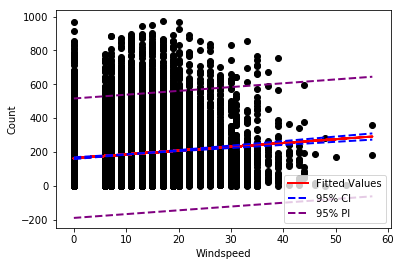

In [33]:
#3(c) 95% Confidence interval and 95% prediction interval and 
# plotting them on them scatter plot. 

# Add the fitted line to the scatter plot
fitted_line, = plt.plot(x3, model3.predict(), '-', color = "red", linewidth = 2, label = "Fitted Values")

# 95% CI and PI 
beta0_hat = model3.params[0]
beta1_hat = model3.params[1]
sigma_hat = np.sqrt(model3.mse_resid)
n = bikeShare.shape[0]
sxx = n * np.var(x3)
xp = np.linspace(x3.min(), x3.max(), 100)
yp_hat = beta0_hat + beta1_hat * xp
se_mu0 = sigma_hat * np.sqrt((1/n) + ((xp-np.mean(x3))**2/sxx))
se_yp = sigma_hat * np.sqrt(1 + (1/n) + ((xp-np.mean(x3))**2/sxx))
crit_val = tdist.ppf(0.975, df = n-2)
ci_low = yp_hat - crit_val * se_mu0
ci_hi = yp_hat + crit_val * se_mu0
pi_low = yp_hat - crit_val * se_yp
pi_hi = yp_hat + crit_val * se_yp
plt.scatter(x3, y, c = "black")
fig1.suptitle("Count vs Windspeed")
plt.ylabel("Count")
plt.xlabel("Windspeed")
lowCI_line, = plt.plot(xp, ci_low, '--', color = "blue", linewidth = 2, label = "95% CI")
uppCI_line, = plt.plot(xp, ci_hi, '--', color = "blue", linewidth = 2, label = "95% CI")
lowPI_line, = plt.plot(xp, pi_low, '--', color = "purple", linewidth = 2, label = "95% PI")
uppPI_line, = plt.plot(xp, pi_hi, '--', color = "purple", linewidth = 2, label = "95% PI")
legend = plt.legend(handles = [fitted_line, lowCI_line, lowPI_line], loc = 4)

In [35]:
# (E) Using you're results form part (d) predict the number of bike 
# rentals in hours for which 
# (i) The outside temprature is 80 degrees fahrenheit 
# (ii) The wind speed in 15 mph 
# (iii) The relative humidity is 100% 

# (i) When the outside temprature is 80 
X1i = 80 
Y1i = beta0a_hat + beta1a_hat*X1i
Y1i 

250.59395913097785

In [64]:
# (ii) When the windspeed in 15
X3i = 15 
Y3i = 162.7879 + 2.249*X3i
Y3i

196.5229

In [65]:
#(iii) When relative humidity 
X2i = 100 
Y2i = 376.4450 - 2.9872*X2i
Y2i

77.72499999999997

In [66]:
# (F) Fit a linear regression model relation count to season using 
# automated functions.

reg1 = smf.ols('y ~ C(x4)', data = bikeShare).fit()
reg1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.061
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     236.9
Date:                Tue, 26 Sep 2017   Prob (F-statistic):          6.16e-149
Time:                        17:33:18   Log-Likelihood:                -71701.
No. Observations:               10886   AIC:                         1.434e+05
Df Residuals:                   10882   BIC:                         1.434e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    116.3433      3.387     34.352      0.000     109.704     122.982
C(x4)[T.2]    98.9081      4.769     20.740      0.000      89.560     108.256
C(x4)[T.3]   118.0739      4.769     24.758      0.000     108.726     127.422
C(x4)[T.4]    82.6450      4.769     17.331      0.000      73.298      91.992
==============================================================================
Omnibus:                     1896.059   Durbin-Watson:                   0.337
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3190.509
Skew:                           1.156   Prob(JB):                         0.00
Kurtosis:                       4.299   Cond. No.                         4.82
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [67]:
# From the model we can see that all of the season's catergorical 
# variables are highly significant. Regression equation will look 
# something like this :
# Y = 116.343 + 98.908X1 + 118.074X2 + 82.645X3, where Beta0 is 116.343 
# and beta1 = 98.908, beta2 = 118.075, beta3 = 82.645. When it'll
# be spring season there will 116.343 rentals per day/hour where as 
# number of rental increases in fall season, declines in summer and 
# winter. Expected value in all of the seasons will looks as follows : 

# (1) Y_spring = Beta0 = 116.343
# (2) Y_summer = Beta0 + Beta2X2 = 116.343 + 98.908*X2
# (3) Y_fall = Beta0 + Beta3X3 = 116.343 + 118.074*X3
# (4) Y_winter = Beta0 + Beta4X4 = 116.343 + 82.645*X4

In [68]:
# (G) Fit a linear regression model relation count to weather using automated 
# functions.

reg2 = smf.ols('y ~ C(x5)', data = bikeShare).fit()
reg2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.018
Model:                            OLS   Adj. R-squared:                  0.017
Method:                 Least Squares   F-statistic:                     65.53
Date:                Tue, 26 Sep 2017   Prob (F-statistic):           5.48e-42
Time:                        17:33:22   Log-Likelihood:                -71948.
No. Observations:               10886   AIC:                         1.439e+05
Df Residuals:                   10882   BIC:                         1.439e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    205.2368      2.117     96.936      0.000     201.087     209.387
C(x5)[T.2]   -26.2813      3.982     -6.599      0.000     -34.087     -18.475
C(x5)[T.3]   -86.3905      6.482    -13.328      0.000     -99.096     -73.685
C(x5)[T.4]   -41.2368    179.567     -0.230      0.818    -393.221     310.748
==============================================================================
Omnibus:                     2029.021   Durbin-Watson:                   0.329
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3492.480
Skew:                           1.221   Prob(JB):                         0.00
Kurtosis:                       4.319   Cond. No.                         109.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [69]:
# From the model we can see that most of the variables are highly
# significant apart from 4 which is stormy. Regression equation will 
# look something like this :
# Y = 205.237 - 26.281X1 - 86.390X2 - 41.237X3, where Beta0 is 205.237 
# and beta1 = -26.281, beta2 = -86.390, beta3 = -41.237. When it'll 
# be nice/sunny weather there will 205.237 rentals per day/hour where 
# as number of rental decreases in cloudy weather, declines even more in 
# stormy and rainy. Expected value in all of the weather's will looks as 
# follows : 

# (1) Y_spring = Beta0 = 205.237
# (2) Y_summer = Beta0 + Beta2X2 = 205.237 - 26.281*X2
# (3) Y_fall = Beta0 + Beta3X3 = 205.237 - 86.390*X3
# (4) Y_winter = Beta0 + Beta4X4 = 205.237 - 41.237*X4
